In [425]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [372]:
# Import the csv dataset
african_economies_df = pd.read_csv('african_economies_dataset.csv')

## Exploratory Data Analysis

In [373]:
african_economies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64472 entries, 0 to 64471
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    64472 non-null  object 
 1   indicator  64472 non-null  object 
 2   Unit       64472 non-null  object 
 3   Date       64472 non-null  int64  
 4   Value      64472 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.5+ MB


In [374]:
african_economies_df.head()

,country,indicator,Unit,Date,Value
0,Cameroon,"Population, total",Number,1960,5176268.0
1,Cameroon,"Population, total",Number,1961,5285231.0
2,Cameroon,"Population, total",Number,1962,5399922.0
3,Cameroon,"Population, total",Number,1963,5520332.0
4,Cameroon,"Population, total",Number,1964,5646316.0


The dataset is not good to be used, so we modify it

In [377]:
# Creating a multiindex setting the country as index and using the 'indicators' as columns
african_economies_df = african_economies_df.pivot_table(values='Value', index=('country','Date'), columns='indicator')

In [378]:
african_economies_df.head()

indicator     Annual growth rate of real GDP per capita (%)  \
country Date                                                  
Algeria 1960                                            NaN   
        1961                                            NaN   
        1962                                            NaN   
        1963                                            NaN   
        1964                                            NaN   

indicator     CO2 emissions (metric tons per capita)  \
country Date                                           
Algeria 1960                                0.546258   
        1961                                0.524643   
        1962                                0.478617   
        1963                                0.447181   
        1964                                0.454132   

indicator     Capital and financial account balance (Net, BoP, cur. US$)  \
country Date                                                               
Algeria 1960                                                NaN            
        1961                                                NaN            
        1962                                                NaN            
        1963                                                NaN            
        1964                                                NaN            

indicator     Central government, Fiscal Balance (Current US $)  \
country Date                                                      
Algeria 1960                                                0.0   
        1961                                                0.0   
        1962                                                0.0   
        1963                                                0.0   
        1964                                                0.0   

indicator     Central government, total expenditure and net lending  (Current US $)  \
country Date                                                                          
Algeria 1960                                                0.0                       
        1961                                                0.0                       
        1962                                                0.0                       
        1963                                                0.0                       
        1964                                                0.0                       

indicator     Consumer Price Index, Total (Annual Growth rates, %)  \
country Date                                                         
Algeria 1960                                                NaN      
        1961                                                NaN      
        1962                                                NaN      
        1963                                                NaN      
        1964                                                NaN      

indicator     Consumer Price Index, in Energy (Annual Growth rates, %)  \
country Date                                                             
Algeria 1960                                                NaN          
        1961                                                NaN          
        1962                                                NaN          
        1963                                                NaN          
        1964                                                NaN          

indicator     Consumer Price Index, in Food (Annual Growth rates, %)  \
country Date                                                           
Algeria 1960                                                NaN        
        1961                                                NaN        
        1962                                                NaN        
        1963                                                NaN        
        1964                                                NaN        

indicator     Exports of goods & serv

In [323]:
african_economies_df.tail()

indicator      Annual growth rate of real GDP per capita (%)  \
country  Date                                                  
Zimbabwe 2019                                       -9.59400   
         2020                                       -0.67478   
         2021                                            NaN   
         2022                                            NaN   
         2023                                            NaN   

indicator      CO2 emissions (metric tons per capita)  \
country  Date                                           
Zimbabwe 2019                                0.802979   
         2020                                     NaN   
         2021                                     NaN   
         2022                                     NaN   
         2023                                     NaN   

indicator      Capital and financial account balance (Net, BoP, cur. US$)  \
country  Date                                                               
Zimbabwe 2019                                                NaN            
         2020                                                NaN            
         2021                                                NaN            
         2022                                                NaN            
         2023                                                NaN            

indicator      Central government, Fiscal Balance (Current US $)  \
country  Date                                                      
Zimbabwe 2019                                       5.366051e+07   
         2020                                       3.921032e+08   
         2021                                      -4.305050e+08   
         2022                                      -2.094711e+08   
         2023                                      -4.743742e+07   

indicator      Central government, total expenditure and net lending  (Current US $)  \
country  Date                                                                          
Zimbabwe 2019                                       2.764762e+09                       
         2020                                       3.176085e+09                       
         2021                                       6.025999e+09                       
         2022                                       5.816871e+09                       
         2023                                       5.971883e+09                       

indicator      Consumer Price Index, Total (Annual Growth rates, %)  \
country  Date                                                         
Zimbabwe 2019                                                NaN      
         2020                                                NaN      
         2021                                                NaN      
         2022                                                NaN      
         2023                                                NaN      

indicator      Consumer Price Index, in Energy (Annual Growth rates, %)  \
country  Date                                                             
Zimbabwe 2019                                                NaN          
         2020                                                NaN          
         2021                                                NaN          
         2022                                                NaN          
         2023                                                NaN          

indicator      Consumer Price Index, in Food (Annual Growth rates, %)  \
country  Date                                                           
Zimbabwe 2019                                                NaN        
         2020                                                NaN        
         2021                                                NaN        
         2022                                                NaN        
         2023                                          

In [379]:
african_economies_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3456 entries, ('Algeria', 1960) to ('Zimbabwe', 2023)
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Annual growth rate of real GDP per capita (%)                          1116 non-null   float64
 1   CO2 emissions (metric tons per capita)                                 3113 non-null   float64
 2   Capital and financial account balance (Net, BoP, cur. US$)             1698 non-null   float64
 3   Central government, Fiscal Balance (Current US $)                      3287 non-null   float64
 4   Central government, total expenditure and net lending  (Current US $)  3276 non-null   float64
 5   Consumer Price Index, Total (Annual Growth rates, %)                   665 non-null    float64
 6   Consumer Price Index, in Energy (Annual Growth rates, %)  

In [325]:
african_economies_df.describe().T

,count,mean,std,min,25%,50%,75%,max
indicator,,,,,,,,
Annual growth rate of real GDP per capita (%),1116.0,1.851289e+00,7.106271e+00,-6.026879e+01,-2.013750e-01,1.913660e+00,4.082727e+00,8.529265e+01
CO2 emissions (metric tons per capita),3113.0,9.164740e-01,1.824989e+00,-2.029113e-02,9.941014e-02,2.419996e-01,7.465340e-01,1.781405e+01
"Capital and financial account balance (Net, BoP, cur. US$)",1698.0,-3.966988e+07,2.702122e+09,-3.499800e+10,-2.104714e+07,7.188547e+07,3.204535e+08,1.954778e+10
"Central government, Fiscal Balance (Current US $)",3287.0,-1.038477e+14,4.606755e+14,-2.146826e+15,-4.185793e+08,-4.862109e+07,0.000000e+00,2.289533e+10
"Central government, total expenditure and net lending (Current US $)",3276.0,4.217249e+09,1.315092e+10,0.000000e+00,0.000000e+00,4.111908e+08,2.323601e+09,1.361091e+11
"Consumer Price Index, Total (Annual Growth rates, %)",665.0,1.921166e+04,4.871963e+05,-9.800000e+00,2.834423e+00,6.000000e+00,1.071799e+01,1.256258e+07
"Consumer Price Index, in Energy (Annual Growth rates, %)",524.0,7.651959e+00,1.121576e+01,-2.533264e+01,1.558526e+00,5.202969e+00,1.055093e+01,1.007005e+02
"Consumer Price Index, in Food (Annual Growth rates, %)",560.0,2.670395e+04,6.231565e+05,-1.290000e+01,2.585040e+00,5.900000e+00,1.290925e+01,1.474563e+07
"Exports of goods & services, Value (WEO, cur. US$)",2150.0,6.522432e+09,1.504067e+10,8.340000e+06,3.981837e+08,1.490295e+09,5.361669e+09,1.417819e+11


In [326]:
african_economies_df.shape

(3456, 28)

In [381]:
# Since the datase has values from 1960 it is better to use more recent data, and from the head of the dataset can be seen that most of those values where NaN's
date_mask = african_economies_df.index.get_level_values('Date') > 1994
african_economies_21st_df = african_economies_df.loc[date_mask]

In [383]:
african_economies_21st_df.head()

indicator     Annual growth rate of real GDP per capita (%)  \
country Date                                                  
Algeria 1995                                            NaN   
        1996                                            NaN   
        1997                                            NaN   
        1998                                            NaN   
        1999                                            NaN   

indicator     CO2 emissions (metric tons per capita)  \
country Date                                           
Algeria 1995                                2.658063   
        1996                                2.600934   
        1997                                2.502439   
        1998                                2.472448   
        1999                                2.531071   

indicator     Capital and financial account balance (Net, BoP, cur. US$)  \
country Date                                                               
Algeria 1995                                      -2.486897e+09            
        1996                                      -4.172870e+09            
        1997                                      -5.431348e+09            
        1998                                       2.800000e+08            
        1999                                      -2.400000e+07            

indicator     Central government, Fiscal Balance (Current US $)  \
country Date                                                      
Algeria 1995                                       1.812097e+08   
        1996                                       1.820252e+09   
        1997                                       1.457813e+09   
        1998                                      -1.840923e+09   
        1999                                      -9.705263e+08   

indicator     Central government, total expenditure and net lending  (Current US $)  \
country Date                                                                          
Algeria 1995                                       1.242494e+10                       
        1996                                       1.325138e+10                       
        1997                                       1.460034e+10                       
        1998                                       1.502656e+10                       
        1999                                       1.559880e+10                       

indicator     Consumer Price Index, Total (Annual Growth rates, %)  \
country Date                                                         
Algeria 1995                                                NaN      
        1996                                                NaN      
        1997                                                NaN      
        1998                                                NaN      
        1999                                                NaN      

indicator     Consumer Price Index, in Energy (Annual Growth rates, %)  \
country Date                                                             
Algeria 1995                                                NaN          
        1996                                                NaN          
        1997                                                NaN          
        1998                                                NaN          
        1999                                                NaN          

indicator     Consumer Price Index, in Food (Annual Growth rates, %)  \
country Date                                                           
Algeria 1995                                                NaN        
        1996                                                NaN        
        1997                                                NaN        
        1998                                                NaN        
        1999                                                NaN        

indicator     Exports of goods & serv

In [384]:
african_economies_21st_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1566 entries, ('Algeria', 1995) to ('Zimbabwe', 2023)
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Annual growth rate of real GDP per capita (%)                          1116 non-null   float64
 1   CO2 emissions (metric tons per capita)                                 1347 non-null   float64
 2   Capital and financial account balance (Net, BoP, cur. US$)             927 non-null    float64
 3   Central government, Fiscal Balance (Current US $)                      1519 non-null   float64
 4   Central government, total expenditure and net lending  (Current US $)  1508 non-null   float64
 5   Consumer Price Index, Total (Annual Growth rates, %)                   665 non-null    float64
 6   Consumer Price Index, in Energy (Annual Growth rates, %)  

In [385]:
# I substitute the the NaN values with the interpolation for each country since it fits better for times series
african_economies_21st_clean_df = african_economies_21st_df.apply(lambda group: group.infer_objects(copy=False).interpolate(method='linear'))

In [386]:
african_economies_21st_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1566 entries, ('Algeria', 1995) to ('Zimbabwe', 2023)
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Annual growth rate of real GDP per capita (%)                          1561 non-null   float64
 1   CO2 emissions (metric tons per capita)                                 1566 non-null   float64
 2   Capital and financial account balance (Net, BoP, cur. US$)             1566 non-null   float64
 3   Central government, Fiscal Balance (Current US $)                      1566 non-null   float64
 4   Central government, total expenditure and net lending  (Current US $)  1566 non-null   float64
 5   Consumer Price Index, Total (Annual Growth rates, %)                   1561 non-null   float64
 6   Consumer Price Index, in Energy (Annual Growth rates, %)  

Zeros in the dataset will be considered as NaN so it has to be checked if there are any 0 values and replace it with NA in order to drop or the column if there are many or dropping the countries

In [387]:
# Check for 0 values in the dataset
african_economies_21st_clean_df.eq(0).sum()

indicator
Annual growth rate of real GDP per capita (%)                              0
CO2 emissions (metric tons per capita)                                     0
Capital and financial account balance (Net, BoP, cur. US$)                 2
Central government, Fiscal Balance (Current US $)                          2
Central government, total expenditure and net lending  (Current US $)      2
Consumer Price Index, Total (Annual Growth rates, %)                       0
Consumer Price Index, in Energy (Annual Growth rates, %)                  10
Consumer Price Index, in Food (Annual Growth rates, %)                     0
Exports of goods & services, Value (WEO, cur. US$)                         0
External Public Debt from Private Creditors (Current USD)                149
GDP (current US$)                                                          5
GDP per capita,(current US$)                                               5
General government final consumption expenditure (current US$)    

In [388]:
# Replacing the 0 with NA
for col in african_economies_21st_clean_df.columns:
    african_economies_21st_clean_df[col] = african_economies_21st_clean_df[col].replace(0, pd.NA)

In [389]:
african_economies_21st_clean_df.isnull().sum()

indicator
Annual growth rate of real GDP per capita (%)                              5
CO2 emissions (metric tons per capita)                                     0
Capital and financial account balance (Net, BoP, cur. US$)                 2
Central government, Fiscal Balance (Current US $)                          2
Central government, total expenditure and net lending  (Current US $)      2
Consumer Price Index, Total (Annual Growth rates, %)                       5
Consumer Price Index, in Energy (Annual Growth rates, %)                  15
Consumer Price Index, in Food (Annual Growth rates, %)                     5
Exports of goods & services, Value (WEO, cur. US$)                         0
External Public Debt from Private Creditors (Current USD)                149
GDP (current US$)                                                          5
GDP per capita,(current US$)                                               5
General government final consumption expenditure (current US$)    

The columns 'Oil exports, Value (Cur. USD)' and 'External Public Debt from Private Creditors (Current USD) have to many NaN so it is better to drop it

In [390]:
african_economies_21st_clean_df = african_economies_21st_clean_df.drop(columns=['Oil exports, Value (Cur. USD)', 'External Public Debt from Private Creditors (Current USD)'])

Now I drop the countries that have NaN values

In [391]:
# I create a boolean DataFrame which contains the NaN rows
na_df = african_economies_21st_clean_df.isnull()

# Check for the rows that have at least one NaN value
african_economies_21st_clean_df[na_df.any(axis=1)].index.get_level_values(0).unique()

Index(['Algeria', 'Burundi', 'Central African Republic', 'Eritrea', 'Gambia',
       'Seychelles', 'Somalia', 'South Sudan'],
      dtype='object', name='country')

In [392]:
# I create a boolean mask with the indexes to be dropped
drop_index_mask = african_economies_21st_clean_df.index.get_level_values(0).isin(['Algeria', 'Burundi', 'Central African Republic', 'Eritrea', 'Gambia',
       'Seychelles', 'Somalia', 'South Sudan'])
# I create a new dataframe wich contains the indexes to be dropped
drop_df = african_economies_21st_clean_df[drop_index_mask]

In [393]:
# I drop the indexes
african_economies_21st_clean_df.drop(drop_df.index, inplace=True)

In [394]:
# Checking again for the null values
african_economies_21st_clean_df.isnull().sum()

indicator
Annual growth rate of real GDP per capita (%)                            0
CO2 emissions (metric tons per capita)                                   0
Capital and financial account balance (Net, BoP, cur. US$)               0
Central government, Fiscal Balance (Current US $)                        0
Central government, total expenditure and net lending  (Current US $)    0
Consumer Price Index, Total (Annual Growth rates, %)                     0
Consumer Price Index, in Energy (Annual Growth rates, %)                 0
Consumer Price Index, in Food (Annual Growth rates, %)                   0
Exports of goods & services, Value (WEO, cur. US$)                       0
GDP (current US$)                                                        0
GDP per capita,(current US$)                                             0
General government final consumption expenditure (current US$)           0
Gross capital formation (current US$)                                    0
Gross capital f

In [395]:
african_economies_21st_clean_df.shape

(1334, 26)

## Showing some graphs

In [396]:
# Check for the average increase of GDP per capita
# Doing a groupby of the dataset of the average values
african_groupby_mean_df = african_economies_21st_clean_df.groupby('country').mean()

# Sorting the values in discending order for a better visualisation in the graph for both GDP per capita and GDP
# GDP per capita sorted
real_gdp_per_capita_growth_sorted = african_groupby_mean_df.sort_values(by='Annual growth rate of real GDP per capita (%)',ascending=False)
# GDP sorted
real_gdp_growth_sorted = african_groupby_mean_df.sort_values(by='Real GDP growth (annual %)',ascending=False)

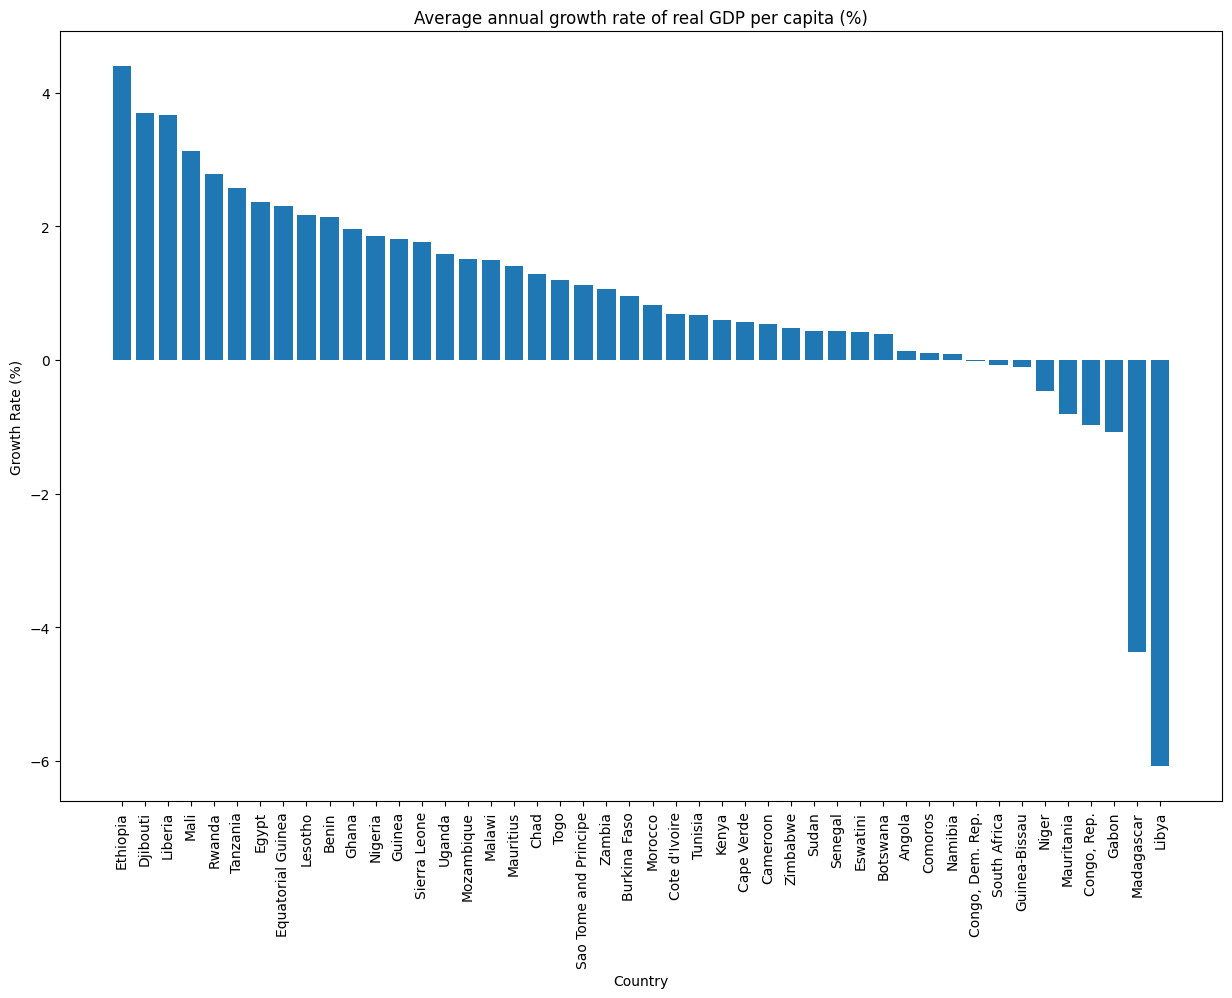

In [397]:
# Set the size of the figure
plt.figure(figsize=(15,10))

# Barplot of the real GDP per capita growth
plt.bar(x=real_gdp_per_capita_growth_sorted.index, height=real_gdp_per_capita_growth_sorted['Annual growth rate of real GDP per capita (%)'])
plt.xticks(rotation=90)
plt.title('Average annual growth rate of real GDP per capita (%)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Country')
plt.show()

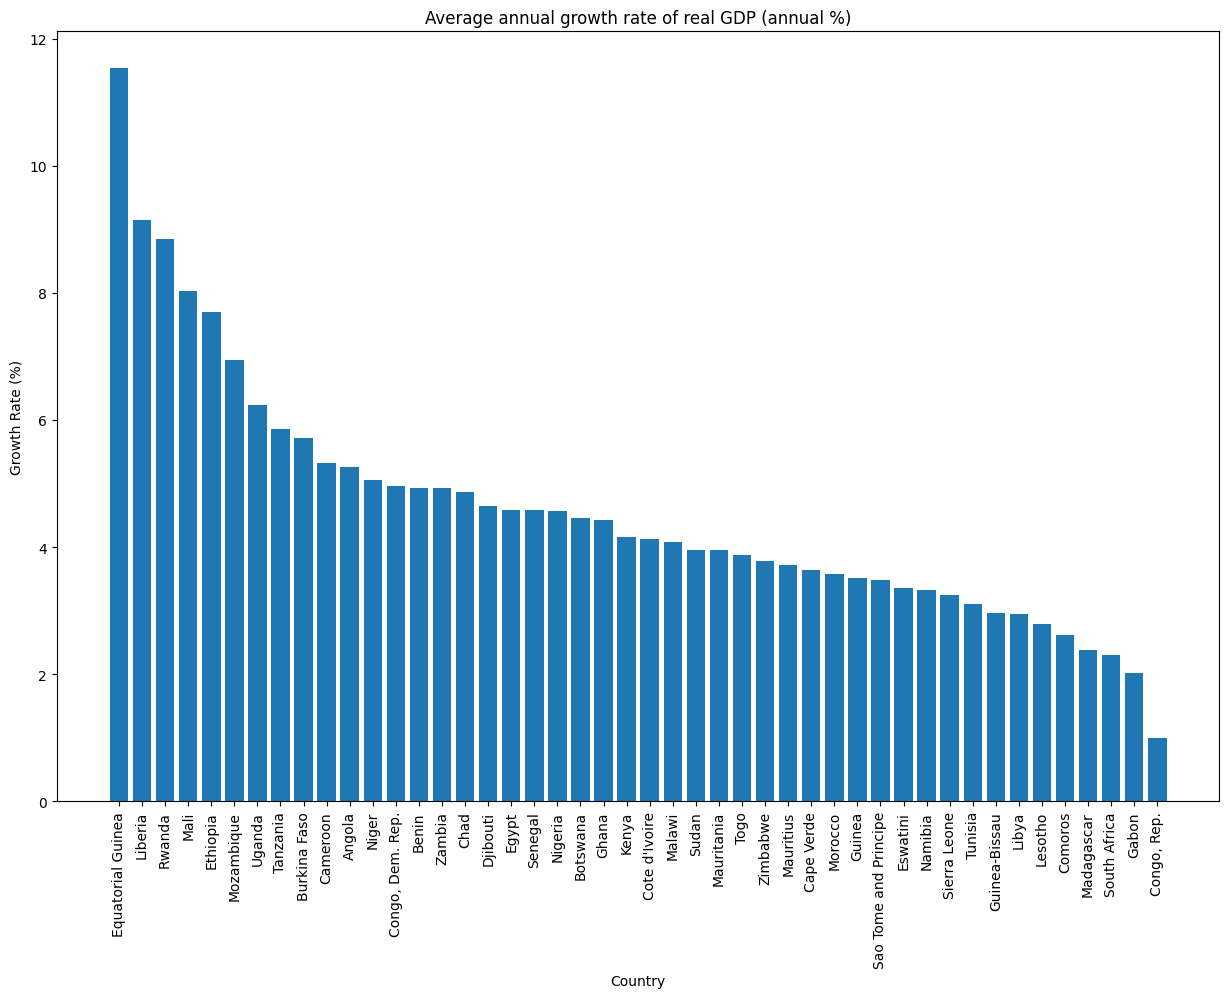

In [399]:
# Set the size of the figure
plt.figure(figsize=(15,10))

# Barplot of the real GDP growth
plt.bar(x=real_gdp_growth_sorted.index, height=real_gdp_growth_sorted['Real GDP growth (annual %)'])
plt.xticks(rotation=90)
plt.title('Average annual growth rate of real GDP (annual %)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('Country')
plt.show()

In [401]:
# Creating two mask to compare how has changed the distribution of GDP per capita
mask_1995 = african_economies_21st_clean_df.index.get_level_values('Date') == 1995
mask_2023 = african_economies_21st_clean_df.index.get_level_values('Date') == 2023
african_economies_1995_df = african_economies_21st_clean_df[mask_1995]
african_economies_2023_df = african_economies_21st_clean_df[mask_2023]

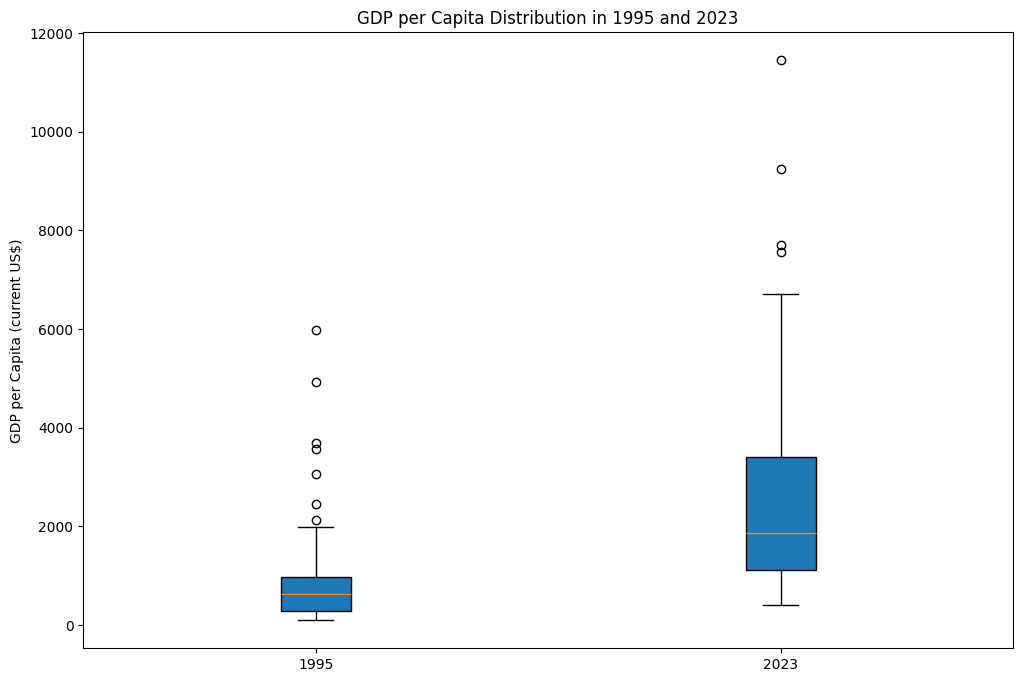

In [403]:
# Set the size of the figure and create a single subplot
fig = plt.figure(figsize=(12, 8))

# Create boxplots for GDP per Capita in 1995 and 2023
plt.boxplot(x=[african_economies_1995_df['GDP per capita,(current US$)'], african_economies_2023_df['GDP per capita,(current US$)']], vert=True,patch_artist=True, labels=['1995','2023'])

# Set the title and labels of the plot
plt.title('GDP per Capita Distribution in 1995 and 2023')
plt.ylabel('GDP per Capita (current US$)')

plt.show()

I decided to focus the further analysis to one specific country, Ethiopia

In [404]:
ethiopia_mask = african_economies_21st_clean_df.index.get_level_values('country') == 'Ethiopia'

In [405]:
ethiopia_df = african_economies_21st_clean_df[ethiopia_mask]

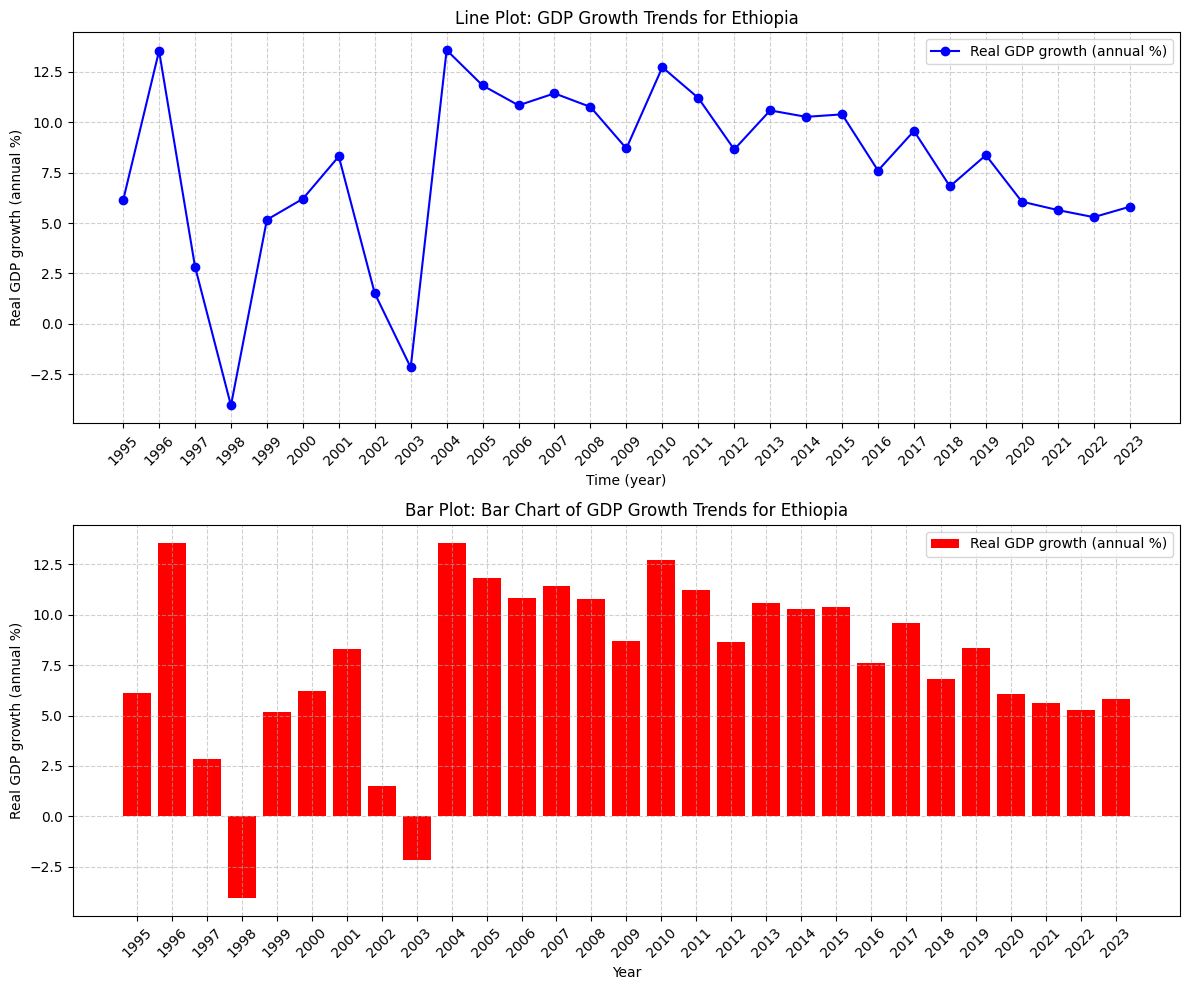

In [408]:
# Now I check into more datails the real GDP growth of Ethiopia year by year
fig1, ax = plt.subplots(2, 1, figsize=(12, 10)) # Create an empty Figure and ax

# Subplot 1: Line plot
ax[0].plot(ethiopia_df.index.get_level_values('Date'), ethiopia_df['Real GDP growth (annual %)'], color='blue', label='Real GDP growth (annual %)', linestyle='-', marker='o')
ax[0].set_xlabel('Time (year)')
ax[0].set_ylabel('Real GDP growth (annual %)')
ax[0].set_title('Line Plot: GDP Growth Trends for Ethiopia')
ax[0].grid(linestyle='--', alpha=0.6)
ax[0].set_xticks(ethiopia_df.index.get_level_values('Date'))
ax[0].set_xticklabels(ethiopia_df.index.get_level_values('Date'), rotation=45)
ax[0].legend()

# Subplot 2: Bar chart 
ax[1].bar(ethiopia_df.index.get_level_values('Date'), ethiopia_df['Real GDP growth (annual %)'], alpha=1, color='red', label='Real GDP growth (annual %)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Real GDP growth (annual %)')
ax[1].set_title('Bar Plot: Bar Chart of GDP Growth Trends for Ethiopia')
ax[1].grid(linestyle='--', alpha=0.6)
ax[1].set_xticks(ethiopia_df.index.get_level_values('Date'))
ax[1].set_xticklabels(ethiopia_df.index.get_level_values('Date'), rotation=45)
ax[1].legend()
plt.tight_layout()  # Ensure proper spacing between subplots
plt.show()

The GDP shows a growth in almost every period, exept for 1998 and 2023

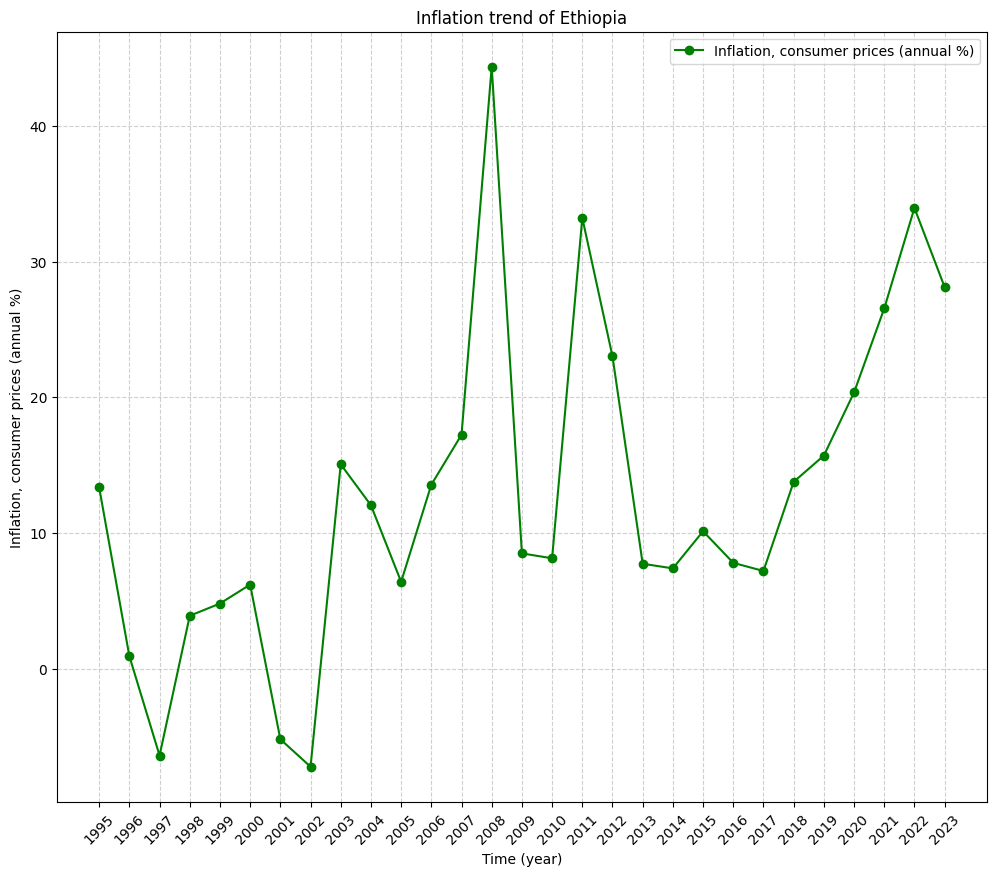

In [415]:
1# Now I check the inflation of Ethiopia year by year
plt.figure(figsize=(12, 10))

plt.plot(ethiopia_df.index.get_level_values('Date'), ethiopia_df['Inflation, consumer prices (annual %)'], color='green', label='Inflation, consumer prices (annual %)', linestyle='-', marker='o')
plt.xlabel('Time (year)')
plt.ylabel('Inflation, consumer prices (annual %)')
plt.title('Inflation trend of Ethiopia')
plt.grid(linestyle='--', alpha=0.6)
plt.xticks(ethiopia_df.index.get_level_values('Date'))
plt.gca().set_xticklabels(ethiopia_df.index.get_level_values('Date'), rotation=45) #  Sets the tick labels for the x-axis
plt.legend()

There are 3 periods of deflation, and for the rest od the perionds the inflation is extremly high with respect to the target value of 2% of the main central banks in the world.

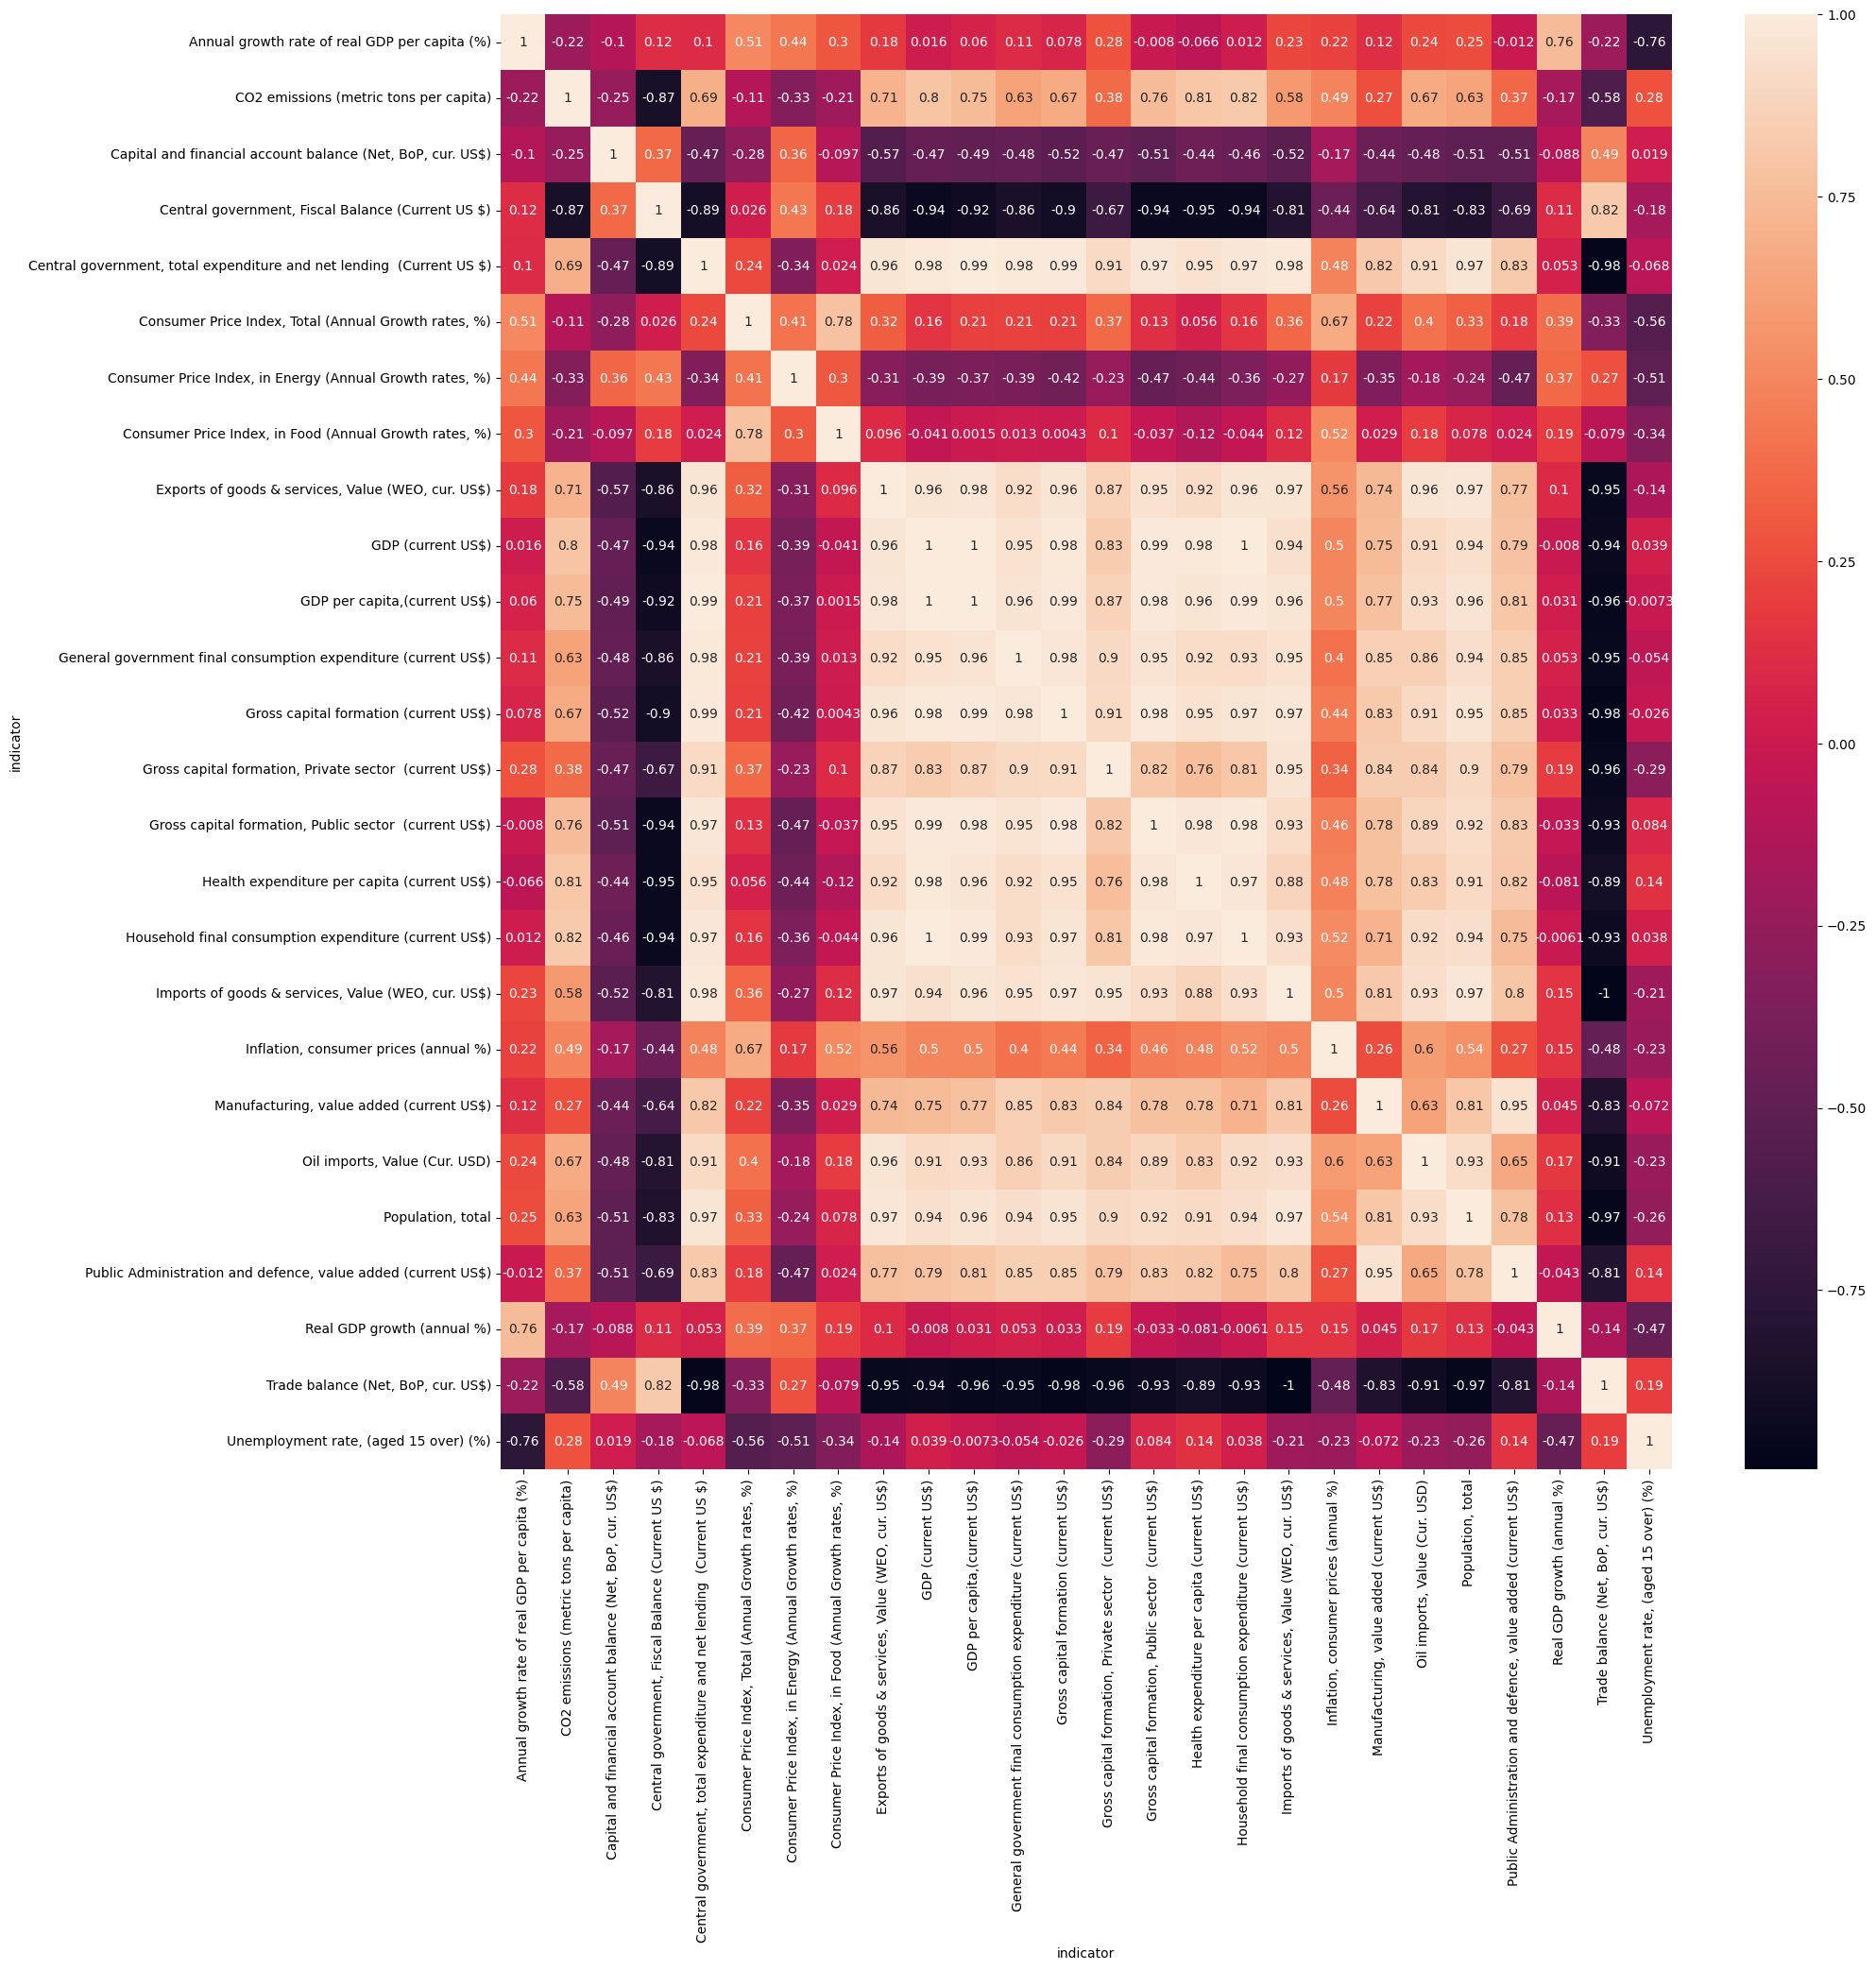

In [410]:
# Let's check for some interesting correlations
plt.figure(figsize=(20,20))
sb.heatmap(data=ethiopia_df.corr(),annot=True)
plt.show()

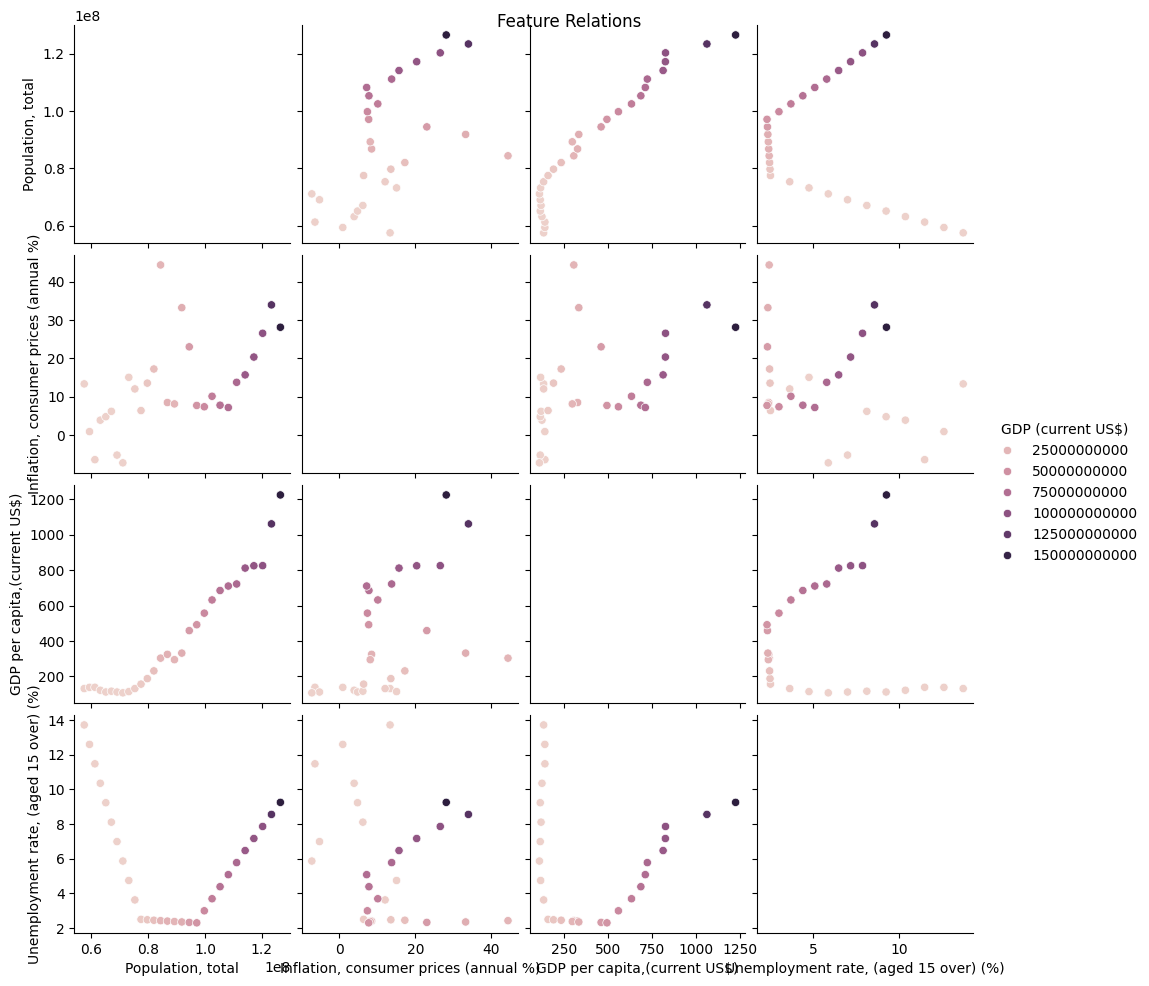

In [416]:
int_corr = sb.pairplot(ethiopia_df[['Population, total', 'Inflation, consumer prices (annual %)', 'GDP (current US$)', 'GDP per capita,(current US$)', 'Unemployment rate, (aged 15 over) (%)']], hue='GDP (current US$)')
int_corr.fig.suptitle('Feature Relations')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


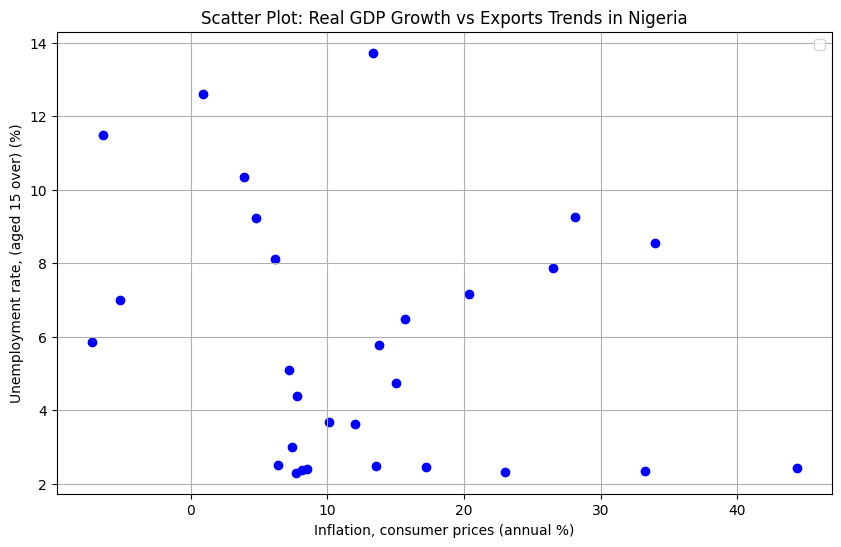

In [432]:
# lets plot our scatter plot for visualization
plt.figure(figsize=(10, 6))

plt.scatter(ethiopia_df['Inflation, consumer prices (annual %)'], ethiopia_df['Unemployment rate, (aged 15 over) (%)'], color='blue', marker='o')

plt.xlabel('Inflation, consumer prices (annual %)')
plt.ylabel('Unemployment rate, (aged 15 over) (%)')
plt.title('Scatter Plot: Real GDP Growth vs Exports Trends in Nigeria')
plt.grid(True)

plt.legend()
plt.show()